In [125]:
import numpy, cv2
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
#from math import log10, sqrt
from JokeFunc import GrayImg
from importlib import reload
GrayImg = reload(GrayImg)

# Read an image

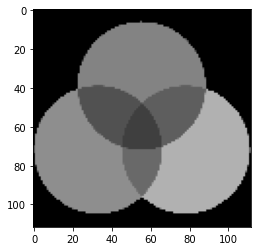

In [157]:
source = r'C:\Users\Admin\Jupyter\Image\3circle.png'
org_img = cv2.imread(source,64)
plt.imshow(org_img , cmap='gray', vmin=0, vmax=255)

# Adding noise

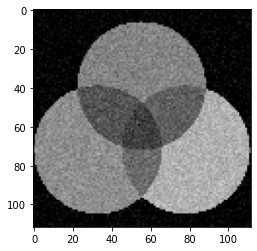

In [156]:
# Adding noise
noisy_img = GrayImg.addnoise(org_img,15)
plt.imshow(noisy_img , cmap='gray', vmin=0, vmax=255)

# Denoising Image by diffusion SOR

In [154]:
shape = noisy_img.shape
if len(shape)!=2:
    print('please enter a gray scale image')
m, n = shape
A = GrayImg.denoise_diff(m,n,alpha=2)
b = noisy_img.reshape(noisy_img.size)

x = LinSys.CG(A,b)
denoise_img = numpy.uint8(x.reshape(m,n))
psnr1 = cv2.PSNR(org_img,noisy_img)
psnr2 = cv2.PSNR(org_img,denoise_img)
print(psnr1,psnr2)

solution converges
26.787608752308753 24.320244505698888


# Compare

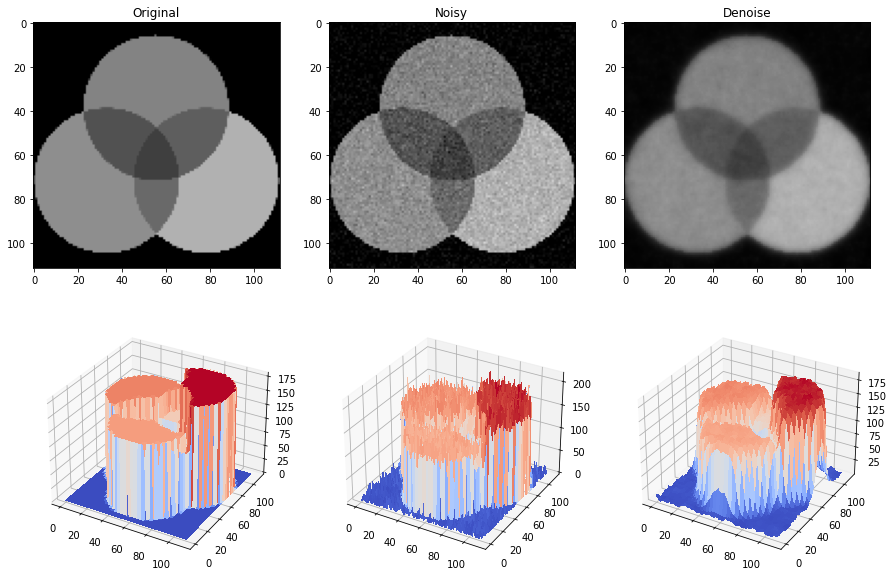

In [158]:
m,n = org_img.shape
X = numpy.arange(0,m, 1)
Y = numpy.arange(0, n, 1)
X, Y = numpy.meshgrid(X, Y)
fig = plt.figure(figsize=(15,10))
fig.add_subplot(2,3,1)
plt.title('Original')
plt.imshow(org_img , cmap='gray', vmin=0, vmax=255)
fig.add_subplot(2,3,2)
plt.title('Noisy')
plt.imshow(noisy_img , cmap='gray', vmin=0, vmax=255)
fig.add_subplot(2,3,3)
plt.title('Denoise')
plt.imshow(denoise_img , cmap='gray', vmin=0, vmax=255)
oiax = fig.add_subplot(234,projection='3d')
oiax.plot_surface(X, Y, org_img, cmap=cm.coolwarm,linewidth=0, antialiased=False)
niax = fig.add_subplot(235,projection='3d')
niax.plot_surface(X, Y, noisy_img, cmap=cm.coolwarm,linewidth=0, antialiased=False)
diax = fig.add_subplot(236,projection='3d')
diax.plot_surface(X, Y, denoise_img, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.show()

# Denoising Image by TV ETM

In [ ]:
def denoise_TV_ETM(image,kMax=2000,alpha=20,beta=1e-4,tau=1e-4,eps=1e-4):
    shape = image.shape
    if len(shape)!=2:
        print('please enter a gray scale image')
        return None
    m, n = shape
    z = numpy.float64(image)
    u = numpy.copy(z)
    
    for k in range(kMax):
        u_old = numpy.copy(u)
        
        normU = numpy.zeros((m,n))
        ux = numpy.append((u[1:,:]-u[:m-1,:]),numpy.zeros((1,n)),0)
        uy = numpy.append((u[:,1:]-u[:,:n-1]),numpy.zeros((m,1)),1)
        normU = (ux**2+uy**2+beta)**(1/2)
        
        a = ux/normU
        b = uy/normU
        a = numpy.append(numpy.zeros((1,n)),a,0)
        b = numpy.append(numpy.zeros((m,1)),b,1)
        ax = a[1:,:]-a[:m,:]
        bx = b[:,1:]-b[:,:n]
        K = ax+bx
                        
        u = u+tau*(z-u+alpha*K)
        
        rel_diff = numpy.linalg.norm(u-u_old)/numpy.linalg.norm(u)    
        res = numpy.linalg.norm(z-u+alpha*K)/numpy.linalg.norm(z)
        
        denoise_image = numpy.uint8(numpy.clip(u,0,255))
        if (k+1)%(kMax//20)==0:
            print(k+1,"PSNR =",PSNR(denoise_image,org_img),'diff = ',rel_diff,'res = ',res)
        
        if rel_diff<eps:
            
            return denoise_image
    
    print('It\'s not converge')
    return denoise_image

# Denoising Image by TV SITM

In [ ]:
def denoise_TV_SITM(image,kMax=2000,alpha=20,beta=1e-4,tau=1e-4,eps=1e-4):
    shape = image.shape
    if len(shape)!=2:
        print('please enter a gray scale image')
        return None
    m, n = shape
    z = numpy.float64(image)
    u = numpy.copy(z)
    
    for k in range(kMax):
        u_old = numpy.copy(u)
        
        normU = numpy.zeros((m,n))
        ux = numpy.append((u[1:,:]-u[:m-1,:]),numpy.zeros((1,n)),0)
        uy = numpy.append((u[:,1:]-u[:,:n-1]),numpy.zeros((m,1)),1)
        normU = (ux**2+uy**2+beta)**(1/2)
        Du = normU**(-1)
        
        K00 = 2*Du+numpy.append(numpy.zeros((1,n)),Du[:m-1,:],0)+numpy.append(numpy.zeros((m,1)),Du[:,:n-1],1)
        K11 =   
        
        a = ux/normU
        b = uy/normU
        a = numpy.append(numpy.zeros((1,n)),a,0)
        b = numpy.append(numpy.zeros((m,1)),b,1)
        ax = a[1:,:]-a[:m,:]
        bx = b[:,1:]-b[:,:n]
        K = ax+bx
                        
        u = u+tau*(z-u+alpha*K)
        
        rel_diff = numpy.linalg.norm(u-u_old)/numpy.linalg.norm(u)    
        res = numpy.linalg.norm(z-u+alpha*K)/numpy.linalg.norm(z)
        
        denoise_image = numpy.uint8(numpy.clip(u,0,255))
        if (k+1)%(kMax//20)==0:
            print(k+1,"PSNR =",PSNR(denoise_image,org_img),'diff = ',rel_diff,'res = ',res)
        
        if rel_diff<eps:
            
            return denoise_image
    
    print('It\'s not converge')
    return denoise_image

# denoise tv bregman

In [ ]:
from skimage.restoration import denoise_tv_bregman


# Denoise the image

In [ ]:
import time
t = time.time()

#denoise_image = denoise_diff_SOR(noisy_img,w=1)

#denoise_image = denoise_TV_ETM(noisy_img,alpha=100)



print(PSNR(noisy_img,org_img))
print(PSNR(denoise_image,org_img))

print('takes time =',time.time()-t)

In [ ]:
reS = numpy.hstack((org_img,noisy_img,denoise_image))
cv2.namedWindow('com', cv2.WINDOW_NORMAL)
cv2.imshow('com',reS)
cv2.waitKey(0)
cv2.destroyAllWindows()